valores de fi:  [ 3  5  6  5 -2  2 13]
divisores en L(i):  [ 720. -120.   48.  -36.   48. -120.  720.]

Polinomio de Lagrange, expresiones
-x*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)/24 + x*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 1)/8 - 5*x*(x - 6)*(x - 5)*(x - 4)*(x - 2)*(x - 1)/36 - x*(x - 6)*(x - 5)*(x - 3)*(x - 2)*(x - 1)/24 - x*(x - 6)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/60 + 13*x*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/720 + (x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/240

Polinomio de Lagrange: 
-11*x**6/120 + 63*x**5/40 - 119*x**4/12 + 677*x**3/24 - 4379*x**2/120 + 1123*x/60 + 3


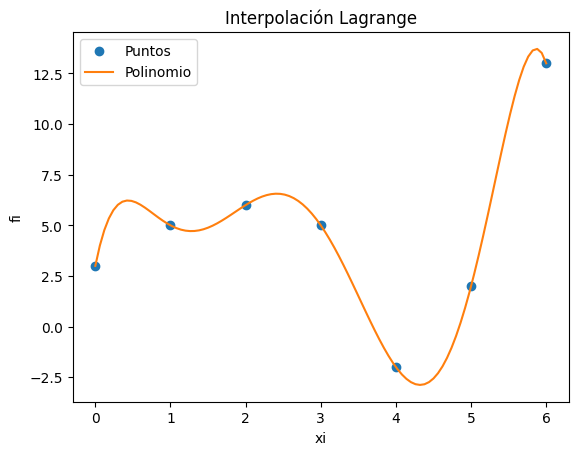

Polinomios por tramos: 
 x = [0,1]
-0.287179487179487*x**3 + 2.28717948717949*x + 3.0
 x = [1,2]
0.435897435897436*x**3 - 2.16923076923077*x**2 + 4.45641025641026*x + 2.27692307692308
 x = [2,3]
-2.45641025641026*x**3 + 15.1846153846154*x**2 - 30.2512820512821*x + 25.4153846153846
 x = [3,4]
5.38974358974359*x**3 - 55.4307692307692*x**2 + 181.594871794872*x - 186.430769230769
 x = [4,5]
-2.1025641025641*x**3 + 34.4769230769231*x**2 - 178.035897435897*x + 293.076923076923
 x = [5,6]
-0.97948717948718*x**3 + 17.6307692307692*x**2 - 93.8051282051282*x + 152.692307692308


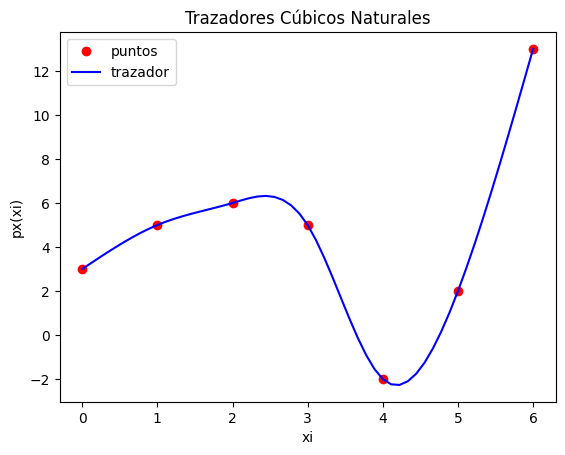

In [5]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


xi = np.array([0, 1, 2, 3, 4, 5, 6])
fi = np.array([3, 5, 6, 5, -2, 2, 13])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplificar el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()


# Trazador cúbico natural
# Condición: S''(x_0) = S''(x_n) = 0
def traza3natural(xi,yi):
    n = len(xi)
    
    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)


# INGRESO , Datos de prueba
xi = np.array([0, 1, 2, 3, 4, 5, 6])
fi = np.array([3, 5, 6, 5, -2, 2, 13])
muestras = 10 

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

    # GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()